# 학생의 성적에 영향을 미치는 요인 파악
- Week2 Pilot Task
- 4기 박정민
- 데이터 전처리 / 피처 엔지니어링

### **Week2에서의 전체적인 흐름**
> 1. 데이터 클린업
> 2. 변수 타입 정리
> 3. 이상치 탐색 및 처리 (필요시)
> 4. 범주형 변수 인코딩
> 5. 스케일링 (필요시)
> 6. 피처 엔지니어링 (파생변수 등)

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EPOCH4기/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()  # 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

- 6607개의 데이터, 20개의 컬럼이 존재.
- 숫자형 변수(int64) : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score (7개)
- 범주형 변수(object) : Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender (13개)

In [4]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


- 총 3개의 컬럼에서 결측치 발견 : Teacher_Quality, Parental_Education_Level, Distance_from_Home
- 3개 모두 dtype이 object인 범주형 변수이다.

## Step1. 데이터 클린업
- 결측치가 있는 변수는 모두 범주형이기에, 최빈값으로 대체하거나 Unknown으로 대체 진행

In [10]:
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
missing_rows = df[df[missing_subset].isnull().any(axis=1)]
missing_rows

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


- 결측치가 존재하는 행은 총 229개로 약 3.466%이다.

### Teacher_Quality 변수 살펴보기
- 결측치가 총 78개 존재

In [7]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


### Parental_Education_Level 변수 살펴보기
- 결측치가 총 90개 존재


In [8]:
df['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,3223
College,1989
Postgraduate,1305


### Distance_from_Home 변수 살펴보기
- 결측치가 총 67개 존재

In [9]:
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


- 결측치가 존재하는 행을 제거하면 데이터 손실이 약 3.466% 이기에 손실률이 낮은 편이다.
- 최빈값으로 대체했을 때 생길 편향 위험과 제거시 3.466% 라는 적은 손실률을 근거로 제거하기로 판단하였다.

In [31]:
# 결측치가 존재하는 3개 변수
missing_subset = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# 결측치가 있는 행 제거
df_clean = df.dropna(subset=missing_subset)

# 결과 확인
print("원래 데이터 크기:", df.shape)
print("결측치 제거 후 데이터 크기:", df_clean.shape)

원래 데이터 크기: (6607, 20)
결측치 제거 후 데이터 크기: (6378, 20)


### 중복 데이터 확인

In [32]:
# 전체 중복 행 개수 확인
duplicates = df_clean.duplicated().sum()
print("중복된 행 개수:", duplicates)

중복된 행 개수: 0


In [33]:
# 인덱스 초기화
df_clean = df_clean.reset_index(drop=True)

# 확인
print(df_clean.head())
print(df_clean.index)


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

## Step2. 변수 타입 정리

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [35]:
num_cols = df_clean.select_dtypes(include=['int64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


- num_cols : 숫자형 변수 7개
- cat_cols : 범주형 변수 13개

## Step3. 이상치 탐색 및 처리

- 숫자형 변수는 박스플롯을 이용하여 확인하고, 범주형 변수는 고유값을 확인하여 이상치 탐색

In [36]:
df_clean.describe()  # 숫자형 변수의 통계정보 확인

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


- 목표변수 Exam_Score에 101점이 존재한다.
- 데이터 입력 오류 가능성이 높기에 101점을 제거하는게 좋아보인다.

In [37]:
df_clean = df_clean[df_clean['Exam_Score'] <= 100]
df_clean.shape

(6377, 20)

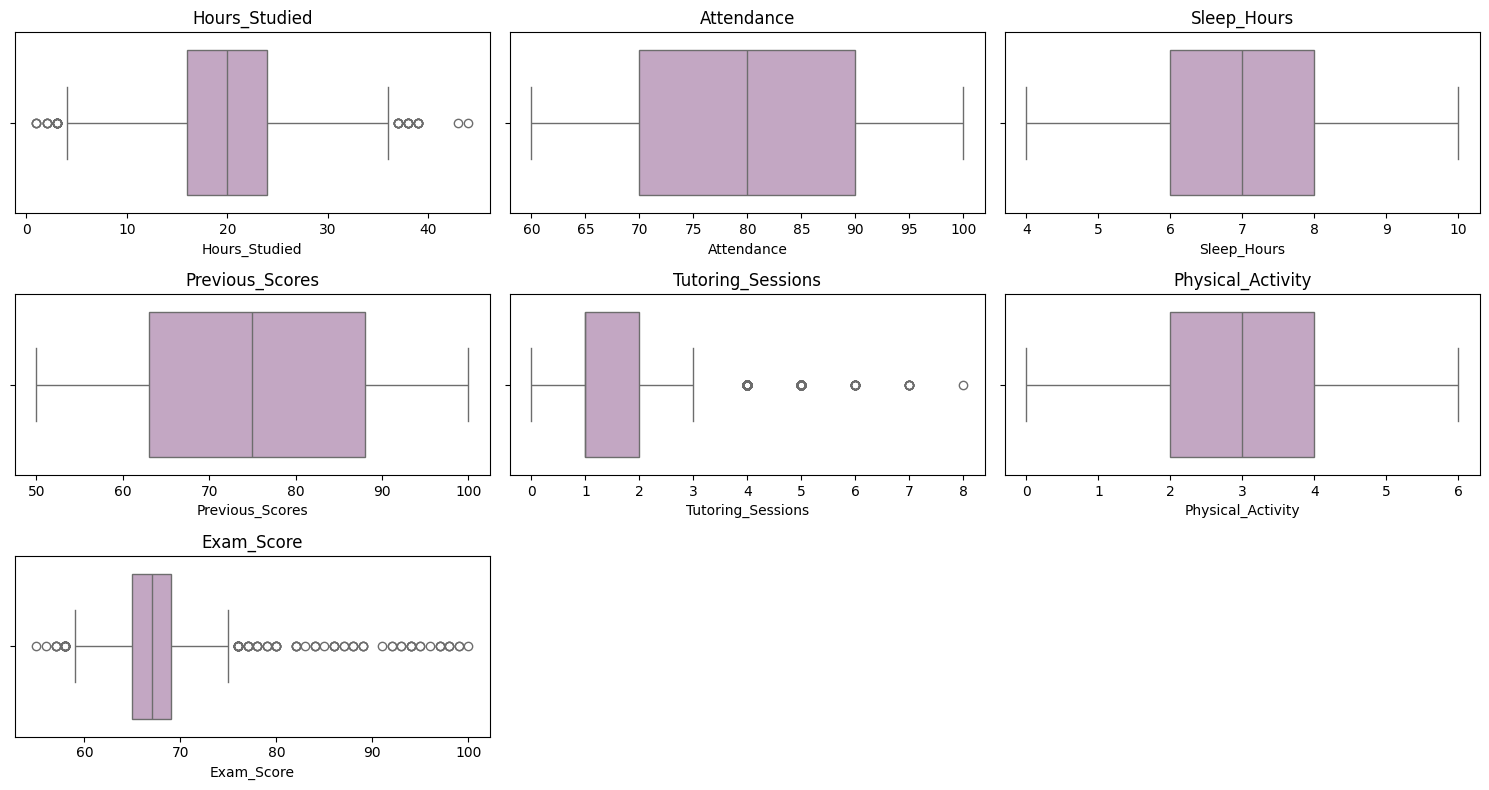

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)   # 3행 3열 배치 (변수 개수 맞춰 자동 조정)
    sns.boxplot(x=df_clean[col], color="#C8A2C8")  # 연보라색
    plt.title(col)

plt.tight_layout()
plt.show()

- 현재 IQR방식으로 이상치를 판단하자면, Hours_Studied, Tutoring_Sessions, Exam_Score가 이상치가 있는 것으로 판단되지만, 대부분 합리적으로 값들이 존재하므로 일단은 이상치를 제거하지 않는 방향으로 진행하겠음.

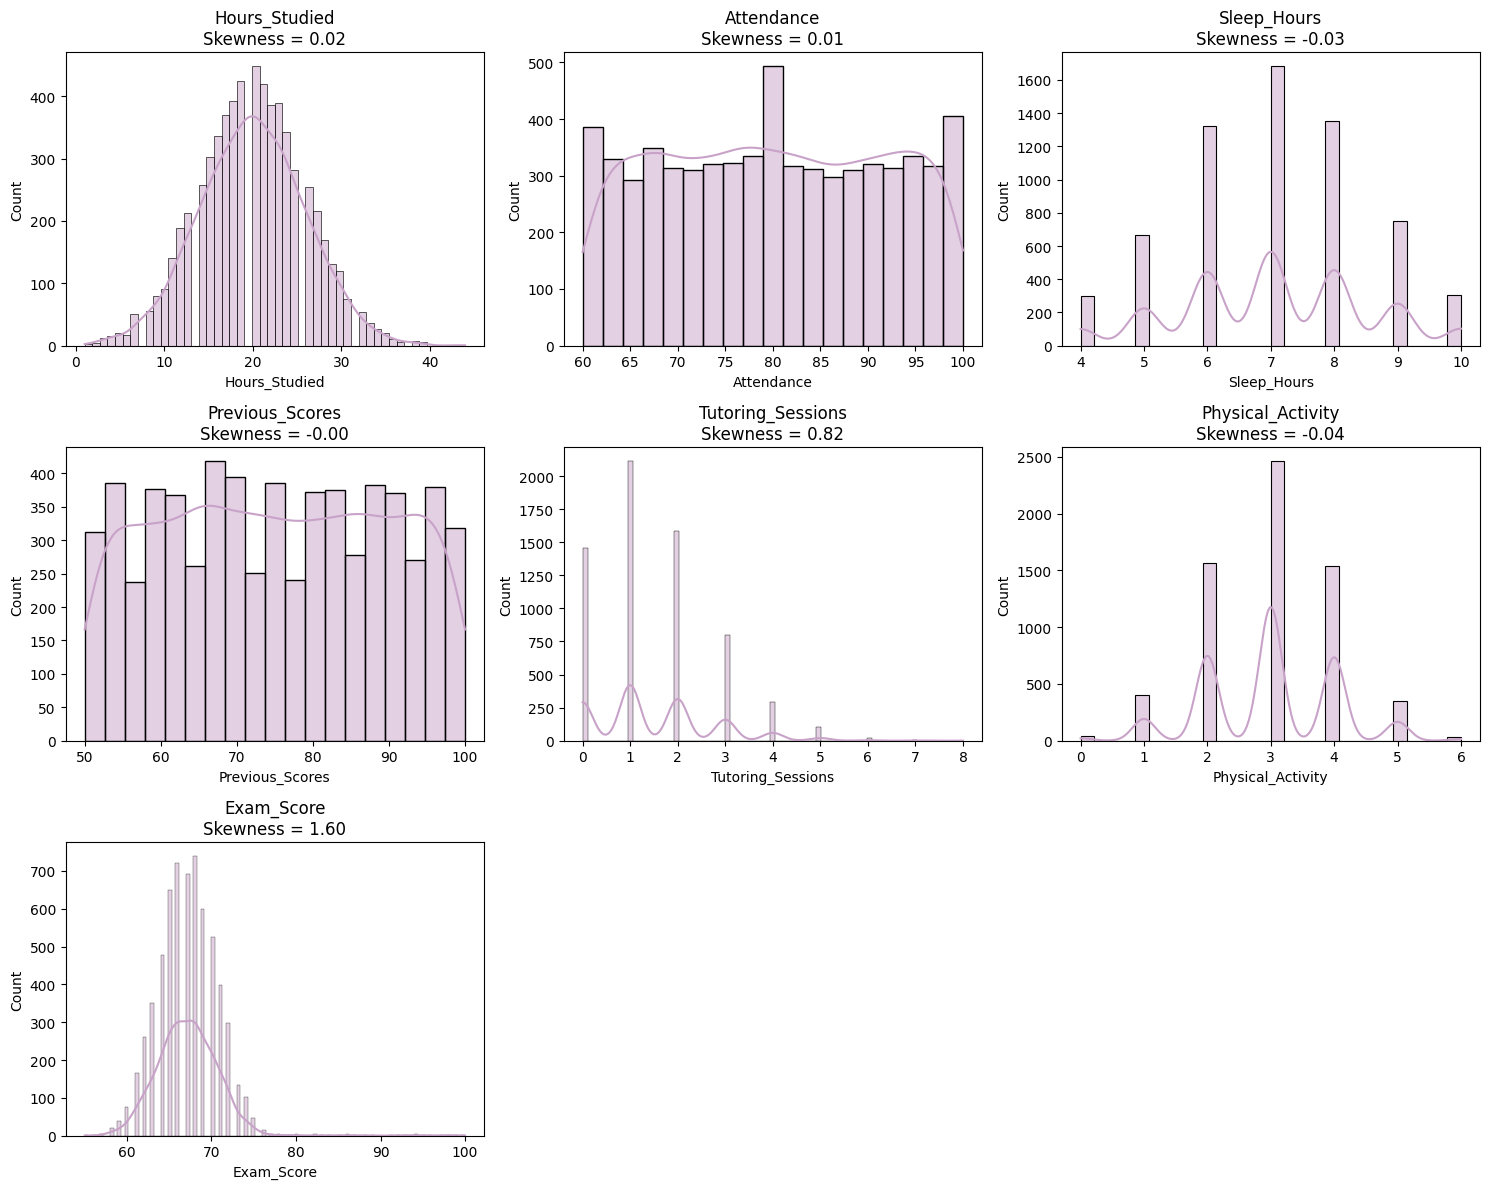

In [39]:
# 왜도 값 확인을 위한 히스토그램
plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3행 3열
    sns.histplot(df_clean[col], kde=True, color="#C8A2C8")
    skew_val = df_clean[col].skew()
    plt.title(f"{col}\nSkewness = {skew_val:.2f}")

plt.tight_layout()
plt.show()

## Step4. 범주형 변수 인코딩

- 순서가 중요한 범주형 변수의 경우 Label Encoding을, 명목형 변수인 경우 One-Hot Encoding을 진행하자.
- 순서가 중요한 변수 : Motivation_Level, Parental_Education_Level, Teacher_Quality, Access_to_Resources, Family_Income, Peer_Influence, Distance_from_Home (13개 중 7개)
- 명목형 변수 : Gender, School_Type, Extracurricular_Activities, Internet_Access, Learning_Disabilities, Parental_Involvement (13개 중 6개)

In [40]:
# 순서형 변수 매핑
ordinal_map = {
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Distance_from_Home": {"Near": 1, "Moderate": 2, "Far": 3}
}

for col, mapping in ordinal_map.items():
    df_clean[col] = df_clean[col].map(mapping)

# 명목형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(
    df_clean,
    columns=['Gender','School_Type','Extracurricular_Activities',
             'Internet_Access','Learning_Disabilities','Parental_Involvement'],
    drop_first=True,   # 다중공선성 방지를 위해 첫 번째 범주는 제거
    dtype=int
)

print("인코딩 후 데이터 shape:", df_encoded.shape)


인코딩 후 데이터 shape: (6377, 21)


In [41]:
df_encoded.head()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
0,23,84,3,7,73,1,0,1,2,3,...,1,1,67,1,1,0,1,0,1,0
1,19,64,2,8,59,1,2,2,2,1,...,2,2,61,0,1,0,1,0,1,0
2,24,98,2,7,91,2,2,2,2,2,...,3,1,74,1,1,1,1,0,0,1
3,29,89,2,8,98,2,1,2,2,1,...,1,2,71,1,1,1,1,0,1,0
4,19,92,2,6,65,2,3,2,3,2,...,2,1,70,0,1,1,1,0,0,1


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6377 non-null   int64
 1   Attendance                      6377 non-null   int64
 2   Access_to_Resources             6377 non-null   int64
 3   Sleep_Hours                     6377 non-null   int64
 4   Previous_Scores                 6377 non-null   int64
 5   Motivation_Level                6377 non-null   int64
 6   Tutoring_Sessions               6377 non-null   int64
 7   Family_Income                   6377 non-null   int64
 8   Teacher_Quality                 6377 non-null   int64
 9   Peer_Influence                  6377 non-null   int64
 10  Physical_Activity               6377 non-null   int64
 11  Parental_Education_Level        6377 non-null   int64
 12  Distance_from_Home              6377 non-null   int64
 13  Exam_Sco

## Step5. 스케일링

- 치우침이 존재하던 Tutoring_Sessions의 값이 0 ~ 8이므로 로그변환을 진행할지 말지에 대한 고려를 해야함.
- 원본과 로그변환 후의 분포 비교 진행.
- 모델링 과정에서 트리 기반 모델을 사용할 경우 원본데이터로 모델링 진행하는게 바람직해보임.

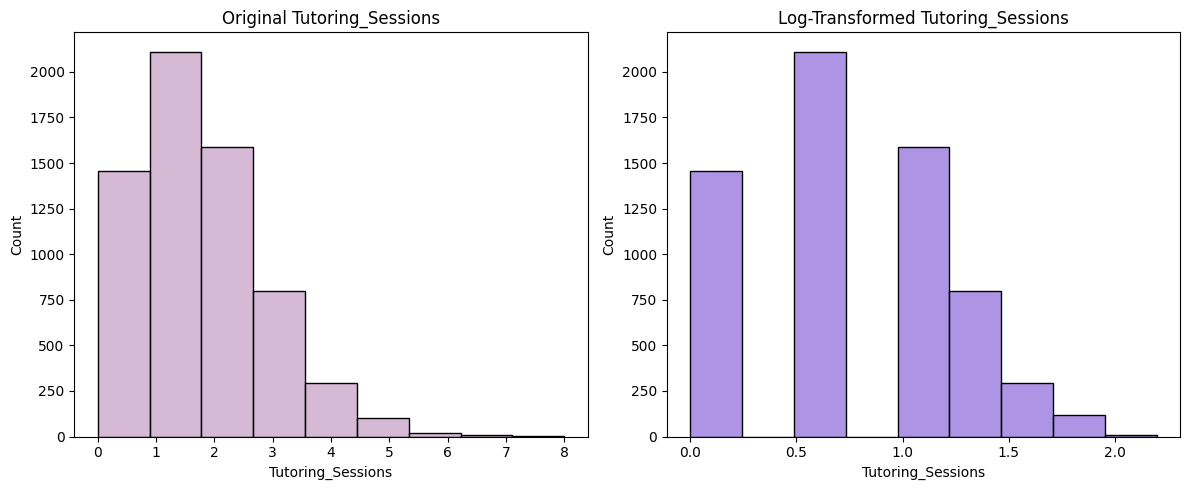

In [43]:
plt.figure(figsize=(12,5))

# 원본 분포
plt.subplot(1,2,1)
sns.histplot(df_encoded['Tutoring_Sessions'], bins=9, color="#C8A2C8", kde=False)
plt.title("Original Tutoring_Sessions")

# 로그 변환 분포
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_encoded['Tutoring_Sessions']), bins=9, color="#9370DB", kde=False)
plt.title("Log-Transformed Tutoring_Sessions")

plt.tight_layout()
plt.show()


- 현재 로그변환을 진행하였을 경우 왜도가 줄어듬이 보이므로 BaseLine인 선형회귀 모델링 단계에서는 로그변환을 하여 모델 적합을 진행하는게 좋아보임.

In [44]:
# 1) 원본 데이터셋 (트리 모델용)
df_tree = df_encoded.copy()

# 2) 로그 변환 데이터셋 (선형 회귀용)
df_linear = df_encoded.copy()
df_linear['Tutoring_Sessions'] = np.log1p(df_linear['Tutoring_Sessions'])


- 로그변환을 진행하였고, 기초통계량을 보며 어떠한 스케일링 방법이 좋을 지 확인해야함.

In [45]:
df_linear.describe()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,...,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,2.098165,7.035126,75.063353,1.908107,0.787520,1.787831,2.197115,2.191626,...,1.705504,1.503685,67.246825,0.578328,0.695154,0.596832,0.924102,0.104751,0.202289,0.509801
std,5.985283,11.549434,0.698689,1.468091,14.399766,0.695720,0.516659,0.743430,0.601027,0.756386,...,0.780581,0.670465,3.891637,0.493865,0.460378,0.490572,0.264855,0.306257,0.401738,0.499943
min,1.000000,60.000000,1.000000,4.000000,50.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,2.000000,6.000000,63.000000,1.000000,0.693147,1.000000,2.000000,2.000000,...,1.000000,1.000000,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,2.000000,7.000000,75.000000,2.000000,0.693147,2.000000,2.000000,2.000000,...,2.000000,1.000000,67.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,90.000000,3.000000,8.000000,88.000000,2.000000,1.098612,2.000000,3.000000,3.000000,...,2.000000,2.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,44.000000,100.000000,3.000000,10.000000,100.000000,3.000000,2.197225,3.000000,3.000000,3.000000,...,3.000000,3.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 현재 극단적으로 큰 값이 존재하지 않고, 0에서 100사이에 값들이 존재하므로, StandardScaler를 이용하여 우선적으로 진행하는게 좋아보임.
- 스케일링 전에 주의할 점
> - 목표변수 Exam_Score는 스케일링을 하지 않는다.
> - 훈련셋과 테스트셋을 분리한 후 스케일링을 진행한다.
> - 더미변수는 꼭 스케일링할 필요가 없다.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y 분리
X = df_linear.drop(columns=['Exam_Score'])
y = df_linear['Exam_Score']

# Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

# StandardScaler 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터로 fit + transform
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터는 transform만

print("훈련 데이터 shape:", X_train_scaled.shape)
print("테스트 데이터 shape:", X_test_scaled.shape)


훈련 데이터 shape: (5101, 20)
테스트 데이터 shape: (1276, 20)


## Step6. 피처 엔지니어링

피처 엔지니어링으로 할 수 있는 다양한 방법에 대해 생각해보자.

- 파생 변수 생성
> - 수면 시간을 구간화
> - 출석률 구간화

- 변수 간 상호작용
> - 공부시간 * 동기레벨 => 공부효율이 달라질 수 있다.
> - 가족소득 * 자원 접근성 => 질 좋은 공부로 인한 성적 상승을 기대할 수 있다.
> - 수면시간 * 야외활동여부 => 건강한 맨탈로 성적 상승을 기대할 수 있다.

=> 다음과 같은 피처들로 인해 변수의 개수가 너무 많아지기에 적용할지에 대한 여부는 이후 모델링 과정에서의 정확성과 해석여부에 따라 파생변수를 추가하고 다른 의미 없는 피처를 제거하는 과정을 진행하고자 한다.

In [ ]:

# df_features = df_linear.copy()

# # 파생 변수 생성
# df_features['Study_Efficiency'] = df_features['Exam_Score'] / (df_features['Hours_Studied'] + 1)  # 0으로 나눔 방지
# df_features['Improvement'] = df_features['Exam_Score'] - df_features['Previous_Scores']

# # 구간화 (Binning)
# df_features['Sleep_Category'] = pd.cut(df_features['Sleep_Hours'],
#                                        bins=[0, 5, 8, 12],
#                                        labels=['Low', 'Normal', 'High'])

# df_features['Attendance_Level'] = pd.cut(df_features['Attendance'],
#                                          bins=[0, 60, 85, 100],
#                                          labels=['Low', 'Medium', 'High'])

# # 상호작용 변수
# df_features['Study_Motivation'] = df_features['Hours_Studied'] * df_features['Motivation_Level']
# df_features['Resource_Income'] = df_features['Access_to_Resources'] * df_features['Family_Income']

# # 이진 변수 (고득점자 여부)
# df_features['High_Achiever'] = (df_features['Previous_Scores'] > 85).astype(int)

# # 원-핫 인코딩 (새로운 범주형 컬럼들 변환)
# df_features = pd.get_dummies(df_features,
#                              columns=['Sleep_Category', 'Attendance_Level'],
#                              drop_first=True, dtype=int)

# print("피처 엔지니어링 후 shape:", df_features.shape)
# df_features.head()


## 진행 상황

### 이번 주 진행 상황
- 데이터 전처리 및 피처 엔지니어링
> - 파생 변수 후보 아이디어 정리 및 코드 설계
> - 하지만 적용 여부는 모델링을 진행한 후 평가/해석을 보고 결정

### 다음 주 진행 방향
1. Baseline 모델 구축
> - 선형회귀
>> - 베이스라인 성능 확인 및 유의성 판단
>> - 현재 변수 해석에 대한 주제이므로 Baseline이 생각보다 중요하다고 판단

2. 모델 성능 비교
> - 선형회귀 이외에 Ridge, Lasso. Elastic 과 같은 정규화 회귀
> - RandomForest, XGBoost 와 같은 트리 기반 모델로 성능 비교 및 피처 중요도 확인

3. 모델 비교 이후 피처 엔지니어링 재검토
> - Baseline과 모델 결과 비교 후, 성능이 향상되는 변수는 유지, 의미 없는 피처는 제거